In [55]:
from matplotlib import pyplot as plt
import numpy as np

In [69]:
player_pos = (0, 0)

width = 20

walls = [
    # bounding box
    ((-10, -10), (-10, 10)),
    ((-10, 10), (10, 10)),
    ((10, 10), (10, -10)),
    ((10, -10), (-10, -10)),

    # triangle1
    ((1, 6), (3, 2)),
    ((3, 2), (7.5, 5)),
    ((7.5, 5), (1, 6)),

    # trapezoid1
    ((2, 3), (1, -8)),
    ((1, -8), (7.5, -2.5)),
    ((7.5, -2.5), (3, -4)),
    ((3, -4), (2, 3)),

    # square1 (left bot)
    ((-7.5, -8.5), (-4, -8.5)),
    ((-4, -8.5), (-5, -5)),
    ((-5, -5), (-8.5, -5)),
    ((-8.5, -5), (-7.5, -8.5)),

    # square2 (left bot small)
    ((-4, -7.5), (-3, -7.5)),
    ((-3, -7.5), (-3, -6)),
    ((-3, -6), (-4, -6)),
    ((-4, -6), (-4, -7.5)),

    # square3 big
    ((-2.5, -2.5), (-2.5, 7.5)),
    ((-2.5, 7.5), (-7.5, 7.5)),
    ((-7.5, 7.5), (-7.5, -2.5)),
    ((-7.5, -2.5), (-2.5, -2.5)),

    # triangle2 (bot right)
    ((2.5, -8), (7.5, -8)),
    ((7.5, -8), (6, -5.5)),
    ((6, -5.5), (2.5, -8)),
]

map_of_points_and_segments = {}

for segment in walls:
    point1, point2 = segment
    if point1 not in map_of_points_and_segments:
        map_of_points_and_segments[point1] = [[],[]]
    if point2 not in map_of_points_and_segments:
        map_of_points_and_segments[point2] = [[],[]]
    map_of_points_and_segments[point1][0].append(segment)
    map_of_points_and_segments[point2][1].append(segment)

# print(map_of_points_and_segments)

{(-10, -10): [[((-10, -10), (-10, 10))], [((10, -10), (-10, -10))]], (-10, 10): [[((-10, 10), (10, 10))], [((-10, -10), (-10, 10))]], (10, 10): [[((10, 10), (10, -10))], [((-10, 10), (10, 10))]], (10, -10): [[((10, -10), (-10, -10))], [((10, 10), (10, -10))]], (1, 6): [[((1, 6), (3, 2))], [((7.5, 5), (1, 6))]], (3, 2): [[((3, 2), (7.5, 5))], [((1, 6), (3, 2))]], (7.5, 5): [[((7.5, 5), (1, 6))], [((3, 2), (7.5, 5))]], (2, 3): [[((2, 3), (1, -8))], [((3, -4), (2, 3))]], (1, -8): [[((1, -8), (7.5, -2.5))], [((2, 3), (1, -8))]], (7.5, -2.5): [[((7.5, -2.5), (3, -4))], [((1, -8), (7.5, -2.5))]], (3, -4): [[((3, -4), (2, 3))], [((7.5, -2.5), (3, -4))]], (-7.5, -8.5): [[((-7.5, -8.5), (-4, -8.5))], [((-8.5, -5), (-7.5, -8.5))]], (-4, -8.5): [[((-4, -8.5), (-5, -5))], [((-7.5, -8.5), (-4, -8.5))]], (-5, -5): [[((-5, -5), (-8.5, -5))], [((-4, -8.5), (-5, -5))]], (-8.5, -5): [[((-8.5, -5), (-7.5, -8.5))], [((-5, -5), (-8.5, -5))]], (-4, -7.5): [[((-4, -7.5), (-3, -7.5))], [((-4, -6), (-4, -7.5))

In [57]:
def extract_heading_points(walls):
    heading_points = []
    for wall in walls:
        heading_points.append(wall[0])

    return heading_points

assert extract_heading_points([((1, 2), (3, 4))]) == [(1, 2)]

In [58]:
def angle_sort(points, origin, start_from):
    points = sorted(points, key=lambda p: np.arctan2(p[1] - origin[1], p[0] - origin[0]), reverse=True)

    # rotate to start from start_from
    while points[0] != start_from:
        points = points[1:] + [points[0]]

    return points
    

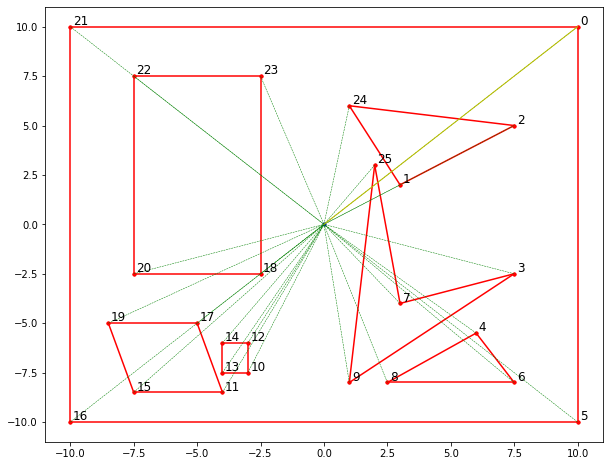

In [59]:
# angle sort
heading_points = extract_heading_points(walls)
sorted_heading_points = angle_sort(heading_points, player_pos, (10, 10))


def plotMap(walls, sorted_heading_points, activePoint, addit=None):
    fig, ax = plt.subplots(figsize=(10,8))

    # plot walls
    if len(walls) > 0:
        for wall in walls:
            ax.plot([wall[0][0], wall[1][0]], [wall[0][1], wall[1][1]], 'ro-', markersize=3)

    # plot center
    ax.plot(0, 0, 'bo', markersize=3)

    # plot heading points number
    if len(sorted_heading_points) > 0:
        for i, point in enumerate(sorted_heading_points):
            ax.text(point[0] + 0.1, point[1] + 0.1, str(i), fontsize=12)
            ax.plot([point[0], 0], [point[1], 0], 'g--', linewidth=0.5)

    ax.plot([activePoint[0], 0], [activePoint[1], 0], 'y-', linewidth=1)

    if addit:
        addit(fig, ax)

    plt.show()

plotMap(walls, sorted_heading_points, activePoint=sorted_heading_points[0])

In [65]:
def get_wall_by_head(point):
    for wall in walls:
        if wall[0] == point:
            return wall

    return None

def get_wall_by_tail(point):
    for wall in walls:
        if wall[1] == point:
            return wall

    return None

"""
Returns a positive value if the points a, b, and c occur in counterclockwise order (c lies to the left of the directed line defined by points a and b).
Returns a negative value if they occur in clockwise order (c lies to the right of the directed line ab).
Returns zero if they are collinear.
"""
def orient2d(a, b, c):
    """
    0 colinear
    -1 counterclockwise
    1 clockwise
    """
    val = (b[0] - a[0]) * (c[1] - a[1]) - (b[1] - a[1]) * (c[0] - a[0])
    if val == 0:
        return 0
    return 1 if val > 0 else -1

def on_segment(p1, p2, q):
    return (q[0] <= max(p1[0], p2[0]) and q[0] >= min(p1[0], p2[0])) and\
            (q[1] <= max(p1[1], p2[1]) and q[1] >= min(p1[1], p2[1]))
            

def intersection(wall1, wall2):
    
    o1 = orient2d(wall1[0], wall1[1], wall2[0])
    o2 = orient2d(wall1[0], wall1[1], wall2[1])
    o3 = orient2d(wall2[0], wall2[1], wall1[0])
    o4 = orient2d(wall2[0], wall2[1], wall1[1])
    
    if o1 != o2 and o3 != o4:
        return True
    
    if o1 == 0 and on_segment(wall1[0], wall1[1], wall2[0]): return True
    if o2 == 0 and on_segment(wall1[0], wall1[1], wall2[1]): return True
    if o3 == 0 and on_segment(wall2[0], wall2[1], wall1[0]): return True
    if o4 == 0 and on_segment(wall2[0], wall2[1], wall1[1]): return True
    return False

def get_line_from_segment(segment):
    return (segment[0][1] - segment[1][1], segment[1][0] - segment[0][0], segment[0][0] * segment[1][1] - segment[1][0] * segment[0][1])
    
def get_intersection_point(wall1, wall2):
    # ax + by = c
    a1, b1, c1 = get_line_from_segment(wall1)
    a2, b2, c2 = get_line_from_segment(wall2)
    
    det = a1 * b2 - a2 * b1
    if det == 0:
        return None
    
    x = (b2 * c1 - b1 * c2) / det
    y = (a1 * c2 - a2 * c1) / det
    
    return (x, y)

def length_between_two_points(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)
    
import heapq

class PriorityQueue:
    def __init__(self, ray):
        self.queue = []
        self._index = 0
        self.ray = ray
        self.unique_walls = set()

    def push(self, wall):
        if wall not in self.unique_walls:
            self.unique_walls.add(wall)
            heapq.heappush(self.queue, (length_between_two_points(get_intersection_point(wall, self.ray), self.ray[0]), self._index, wall))
            self._index += 1

    def pop(self):
        result = heapq.heappop(self.queue)[-1]
        self.unique_walls.remove(result[2])
        return result

    def show_queue(self):
        return [ wall[2] for wall in self.queue ]
    
    def update_ray(self, ray):
        self.ray = ray
    
    def clear(self):
        self.queue = []
        self._index = 0
    
    def consider_next_point(self, point):

        # point is a beginning of a segment, so we wanna add it to queue
        for segment in map_of_points_and_segments[point][0]:
            if len([wall for wall in self.queue if wall[2] == segment]) == 0:
                self.push(segment)
        
        # point is an end of a segment, so we wanna remove it from queue
        for segment in map_of_points_and_segments[point][1]:
            self.queue = [ wall for wall in self.queue if wall[2] != segment ]

def put_walls_on_stack(priority_q: PriorityQueue, ray, walls):
    for wall in walls:
        if intersection(wall, ray):
            priority_q.push(wall)

def calculate_ray(segment, map_width):
    a,b,c = get_line_from_segment(segment)
    second_point = (map_width,(-c-a*map_width)/b)
    return (segment[0], second_point)
    

sorted_heading_points: [(10, 10), (3, 2), (7.5, 5), (7.5, -2.5), (6, -5.5), (10, -10), (7.5, -8), (3, -4), (2.5, -8), (1, -8), (-3, -7.5), (-4, -8.5), (-3, -6), (-4, -7.5), (-4, -6), (-7.5, -8.5), (-10, -10), (-5, -5), (-2.5, -2.5), (-8.5, -5), (-7.5, -2.5), (-10, 10), (-7.5, 7.5), (-2.5, 7.5), (1, 6), (2, 3)]
walls: [((-10, -10), (-10, 10)), ((-10, 10), (10, 10)), ((10, 10), (10, -10)), ((10, -10), (-10, -10)), ((1, 6), (3, 2)), ((3, 2), (7.5, 5)), ((7.5, 5), (1, 6)), ((2, 3), (1, -8)), ((1, -8), (7.5, -2.5)), ((7.5, -2.5), (3, -4)), ((3, -4), (2, 3)), ((-7.5, -8.5), (-4, -8.5)), ((-4, -8.5), (-5, -5)), ((-5, -5), (-8.5, -5)), ((-8.5, -5), (-7.5, -8.5)), ((-4, -7.5), (-3, -7.5)), ((-3, -7.5), (-3, -6)), ((-3, -6), (-4, -6)), ((-4, -6), (-4, -7.5)), ((-2.5, -2.5), (-2.5, 7.5)), ((-2.5, 7.5), (-7.5, 7.5)), ((-7.5, 7.5), (-7.5, -2.5)), ((-7.5, -2.5), (-2.5, -2.5)), ((2.5, -8), (7.5, -8)), ((7.5, -8), (6, -5.5)), ((6, -5.5), (2.5, -8))]


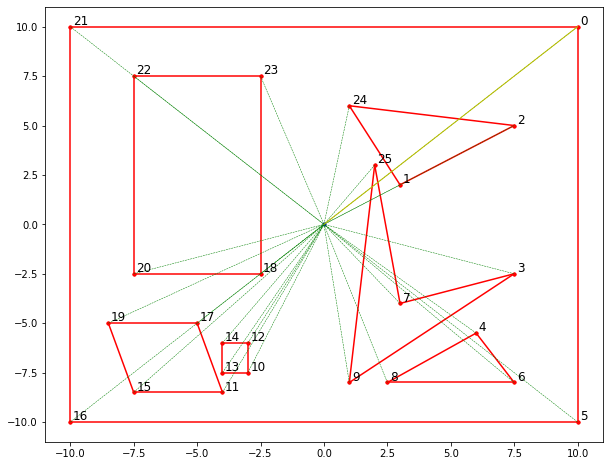

In [61]:
print(f"sorted_heading_points: {sorted_heading_points}")
print(f"walls: {walls}")
plotMap(walls, sorted_heading_points, activePoint=sorted_heading_points[0])

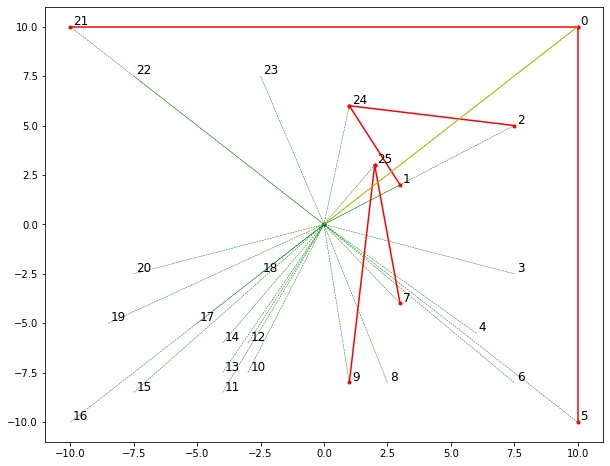

first point:  (2, 3)
ray: ((0, 0), (20, 30.0))
considered wall: ((2, 3), (1, -8))


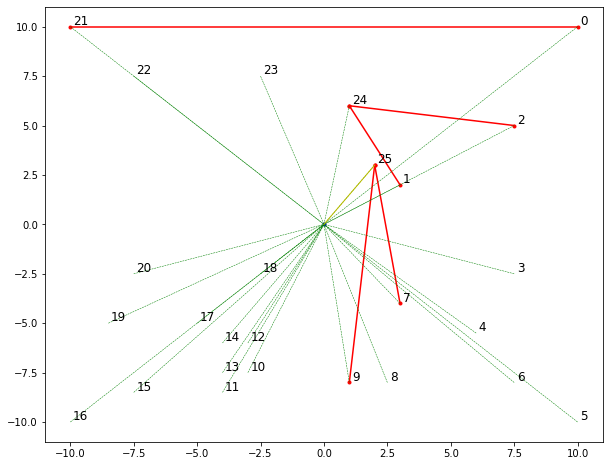

In [68]:
first_point = sorted_heading_points[0]
ray = calculate_ray((player_pos, first_point), 20)
priority_q = PriorityQueue(ray)
put_walls_on_stack(priority_q, ray, walls)
plotMap(priority_q.show_queue(), sorted_heading_points, activePoint=sorted_heading_points[0])

considered_wall = priority_q.pop()
priority_q.clear()
first_point = considered_wall[0]
ray = calculate_ray((player_pos, first_point), width)

put_walls_on_stack(priority_q, ray, walls)
print("first point: ", first_point)
print(f"ray: {ray}")
print(f"considered wall: {considered_wall}")
plotMap(priority_q.show_queue(), sorted_heading_points, activePoint=first_point)

In [ ]:
triangles = []

while len(sorted_heading_points) != 0:
    next_point = sorted_heading_points.pop(0)
    
    if first_point == next_point:
        continue

    if next_point == considered_wall[1]:
        if first_point == considered_wall[0]:
            triangles.append((player_pos, first_point, next_point))
        elif first_point != considered_wall[1]:
             beginning_point = calculate_background_point_on_wall(player_pos, first_point, considered_wall)
             triangles.append((player_pos, beginning_point, next_point))
        first_point = next_point
        considered_wall = priority_q.pop()
        continue


    orientation_of_a_point = orient2d(considered_wall[0], considered_wall[1], next_point)
    if orientation_of_a_point > 0:
        
        continue

    
    
    ray = (player_pos, next_point)
    priority_q.update_ray(ray)
    put_walls_on_stack(priority_q, ray, walls)
    
    while True:
        wall = priority_q.pop()
        if wall[0] == considered_wall[-1][1]:
            considered_wall.append(wall)
            break

    considered_points.append(next_point)

TypeError: 'NoneType' object is not subscriptable

deque([((-10, -10), (-10, 10))])


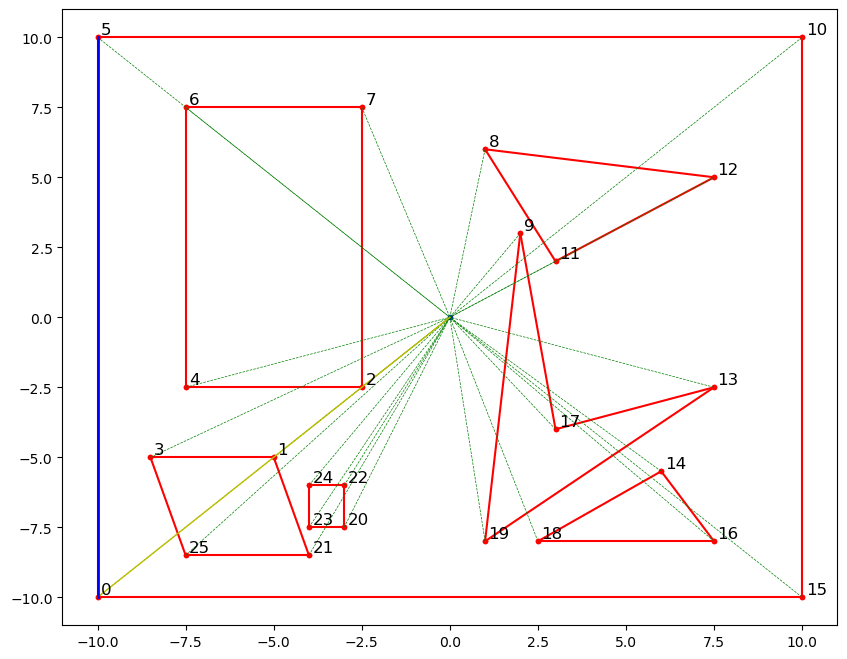

head: (-5, -5), tail: (-8.5, -5), orientActivelWall: -100, orientRay: -17.5, activeWall: ((-10, -10), (-10, 10))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5))])


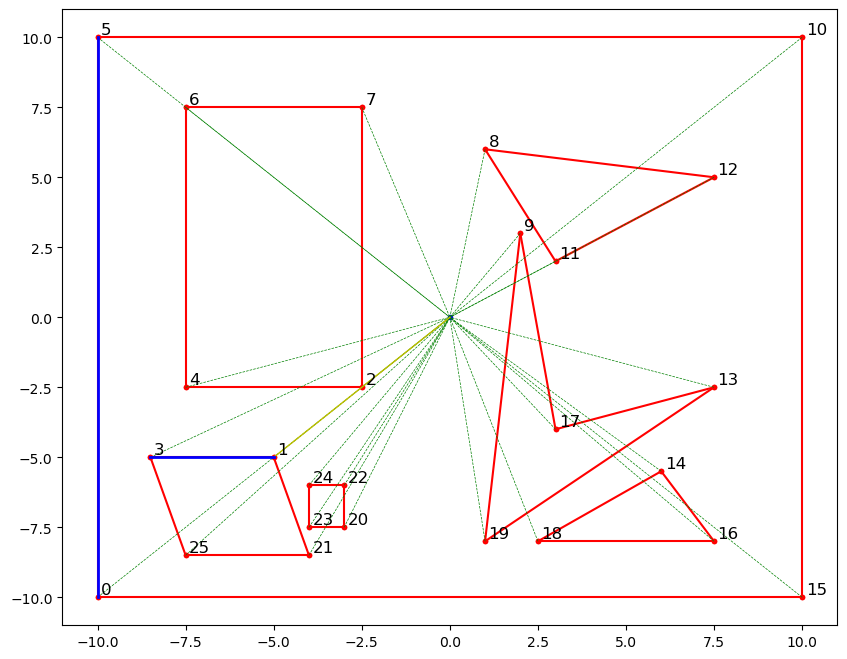

head: (-2.5, -2.5), tail: (-2.5, 7.5), orientActivelWall: -8.75, orientRay: -25.0, activeWall: ((-5, -5), (-8.5, -5))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-2.5, -2.5), (-2.5, 7.5))])


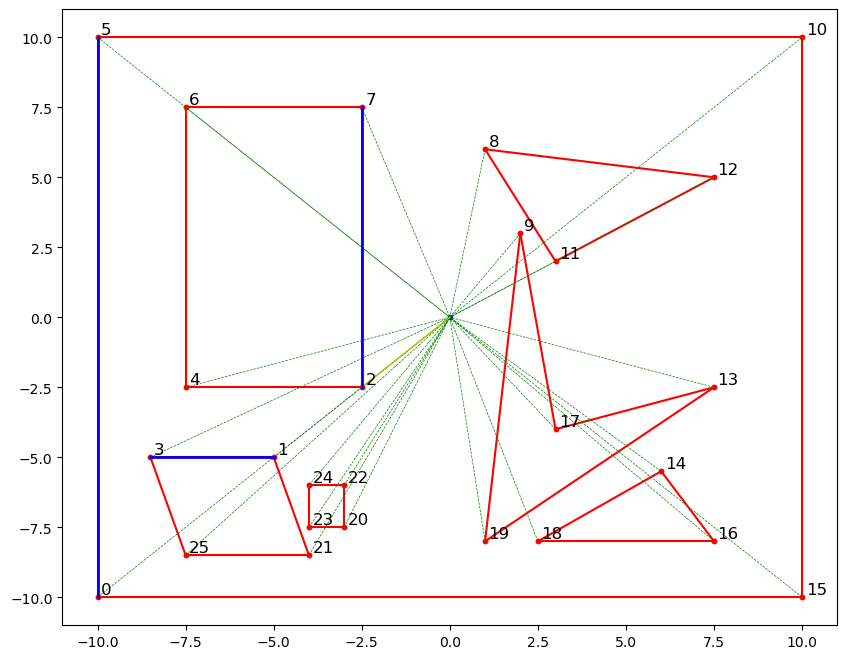

head: (-8.5, -5), tail: (-7.5, -8.5), orientActivelWall: 60.0, orientRay: 34.75, activeWall: ((-2.5, -2.5), (-2.5, 7.5))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-2.5, -2.5), (-2.5, 7.5))])


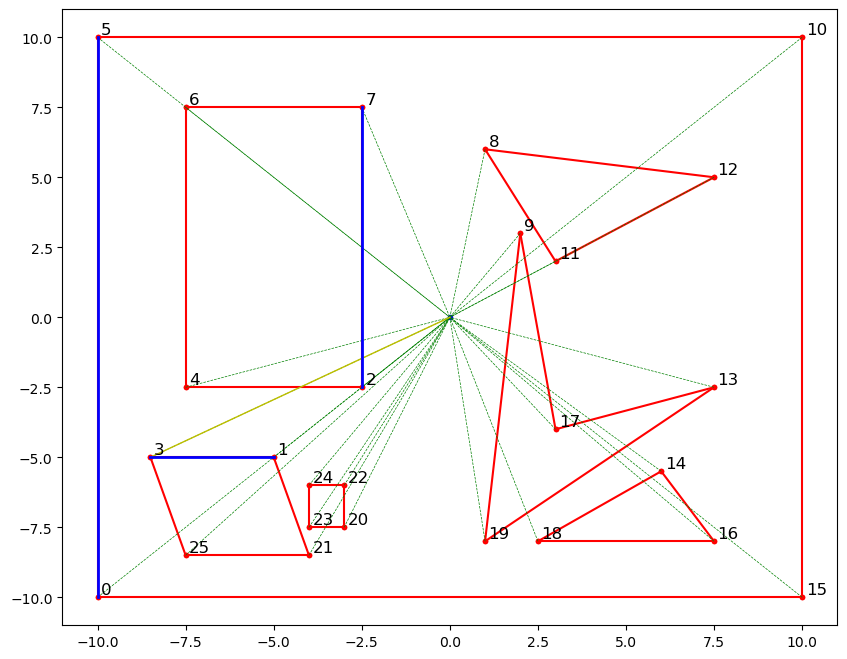

head: (-7.5, -2.5), tail: (-2.5, -2.5), orientActivelWall: 50.0, orientRay: 12.5, activeWall: ((-2.5, -2.5), (-2.5, 7.5))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-2.5, -2.5), (-2.5, 7.5))])


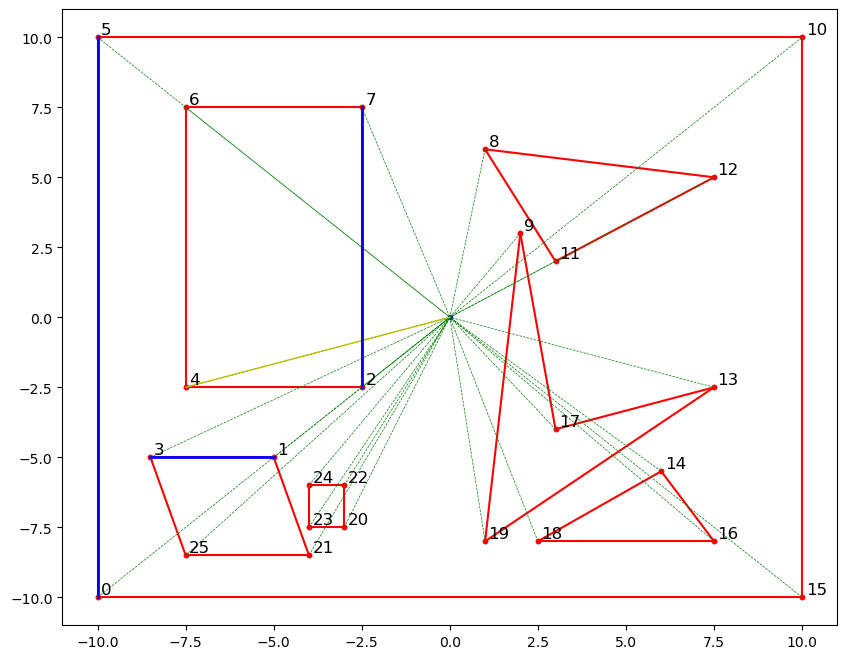

head: (-10, 10), tail: (10, 10), orientActivelWall: 75.0, orientRay: -200, activeWall: ((-2.5, -2.5), (-2.5, 7.5))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-10, 10), (10, 10)), ((-2.5, -2.5), (-2.5, 7.5))])


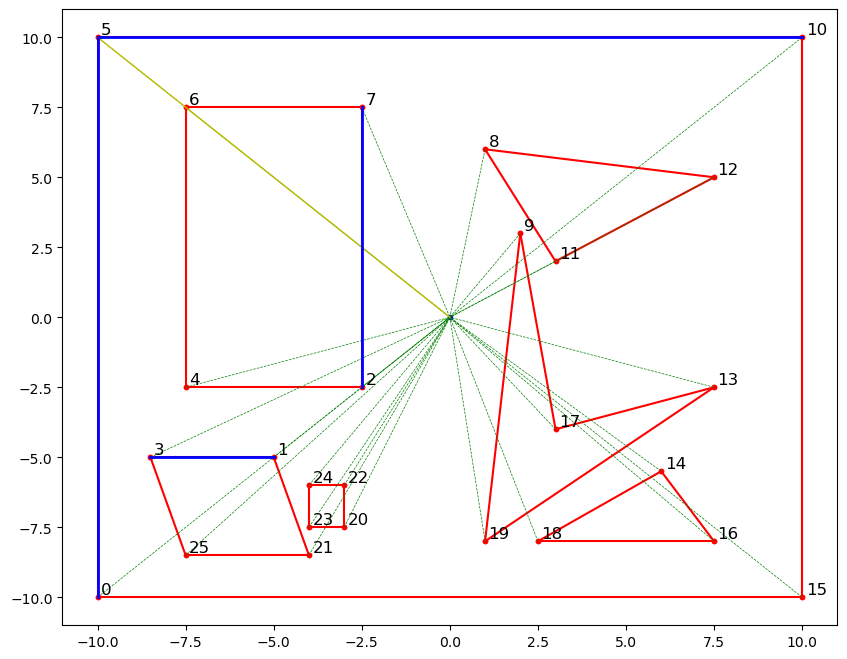

head: (-7.5, 7.5), tail: (-7.5, -2.5), orientActivelWall: 50.0, orientRay: 75.0, activeWall: ((-2.5, -2.5), (-2.5, 7.5))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-10, 10), (10, 10)), ((-2.5, -2.5), (-2.5, 7.5))])


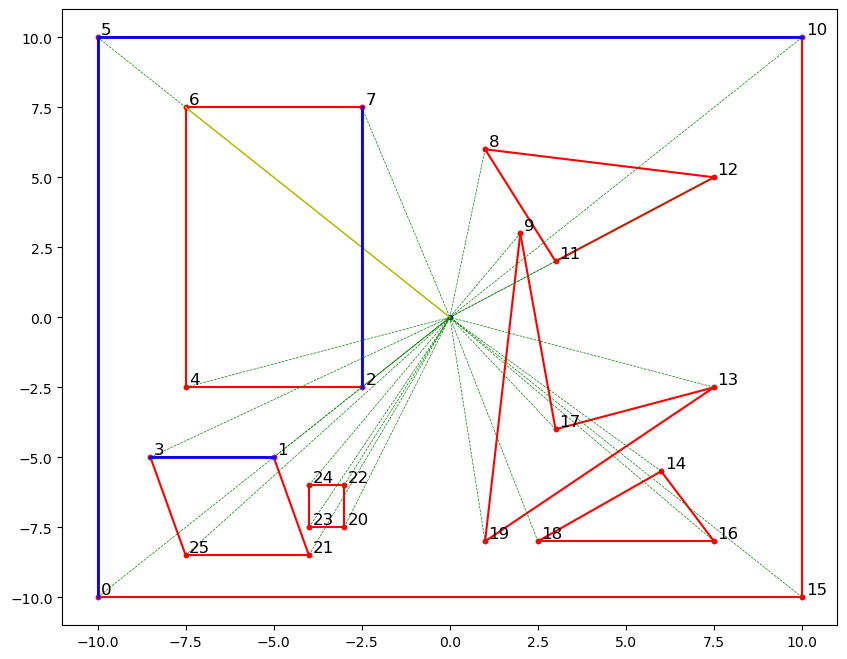

head: (-2.5, 7.5), tail: (-7.5, 7.5), orientActivelWall: 0.0, orientRay: 37.5, activeWall: ((-2.5, -2.5), (-2.5, 7.5))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-10, 10), (10, 10))])


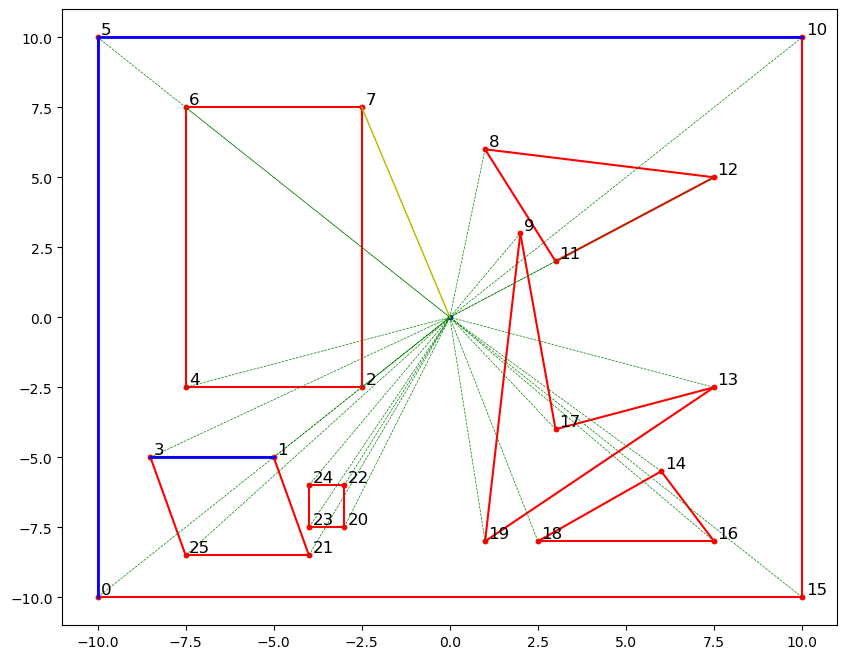

head: (1, 6), tail: (3, 2), orientActivelWall: -80, orientRay: -16, activeWall: ((-10, 10), (10, 10))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-10, 10), (10, 10)), ((1, 6), (3, 2))])


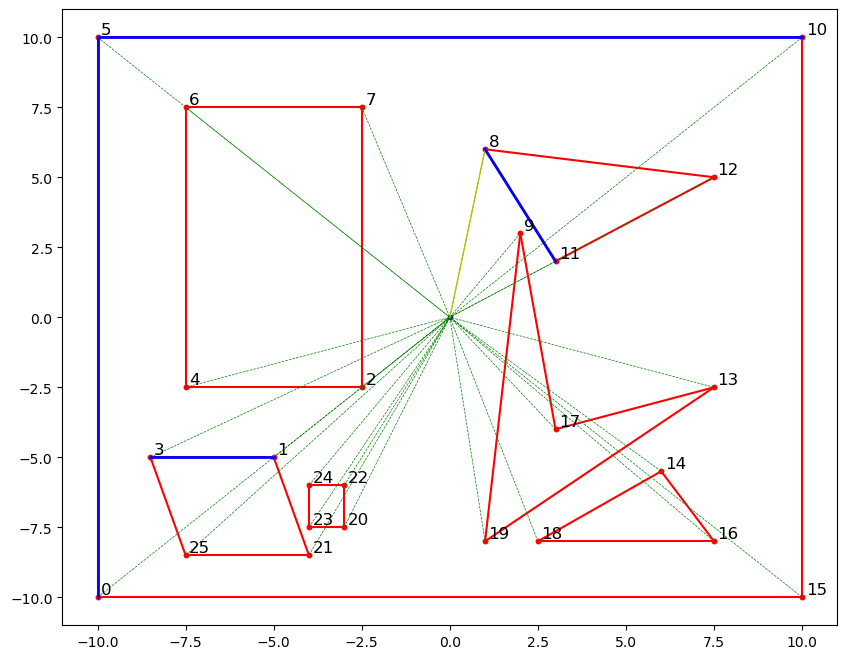

head: (2, 3), tail: (1, -8), orientActivelWall: -2, orientRay: -19, activeWall: ((1, 6), (3, 2))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-10, 10), (10, 10)), ((1, 6), (3, 2)), ((2, 3), (1, -8))])


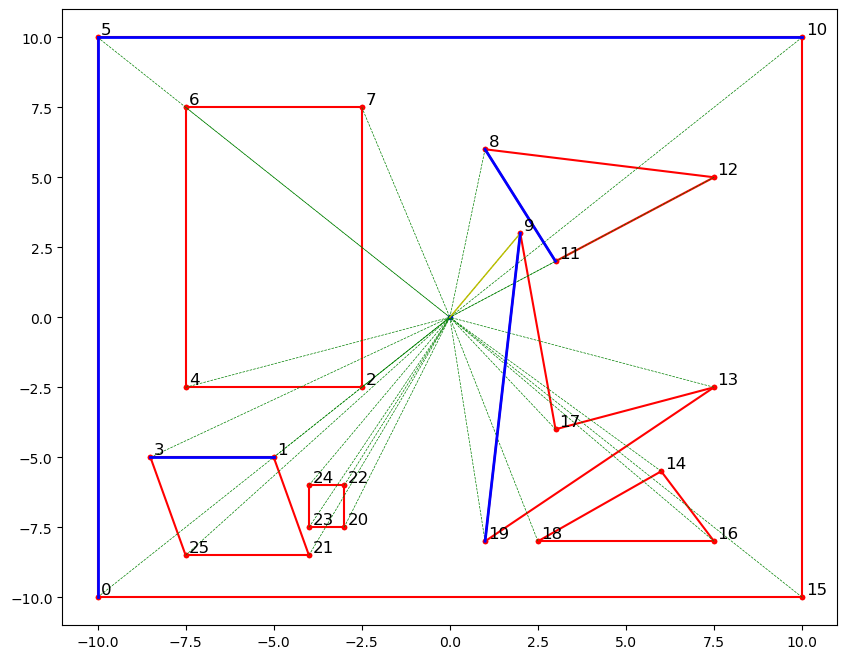

head: (10, 10), tail: (10, -10), orientActivelWall: 81, orientRay: -200, activeWall: ((2, 3), (1, -8))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-10, 10), (10, 10)), ((1, 6), (3, 2)), ((10, 10), (10, -10)), ((2, 3), (1, -8))])


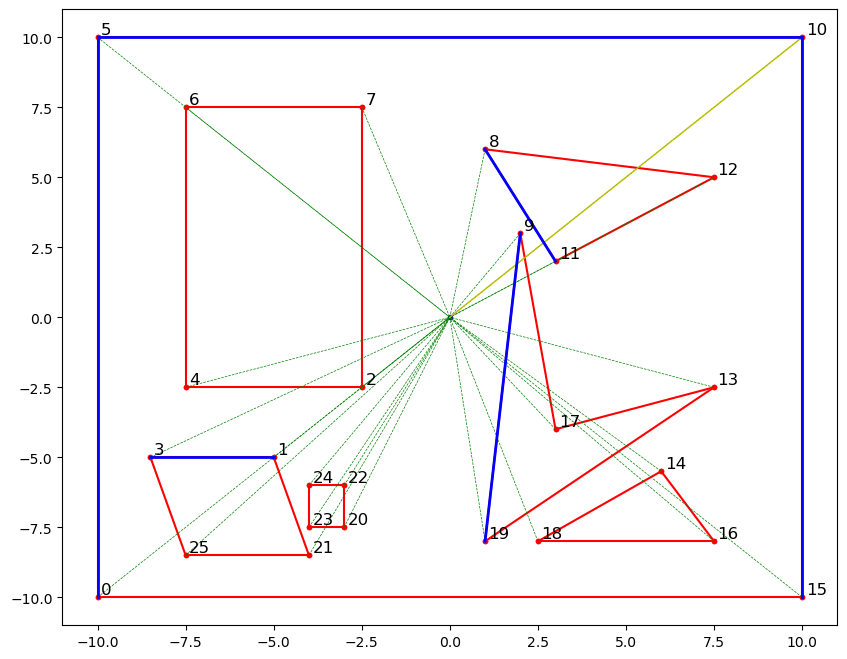

head: (3, 2), tail: (7.5, 5), orientActivelWall: 12, orientRay: 0.0, activeWall: ((2, 3), (1, -8))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-10, 10), (10, 10)), ((1, 6), (3, 2)), ((10, 10), (10, -10)), ((3, 2), (7.5, 5)), ((2, 3), (1, -8))])


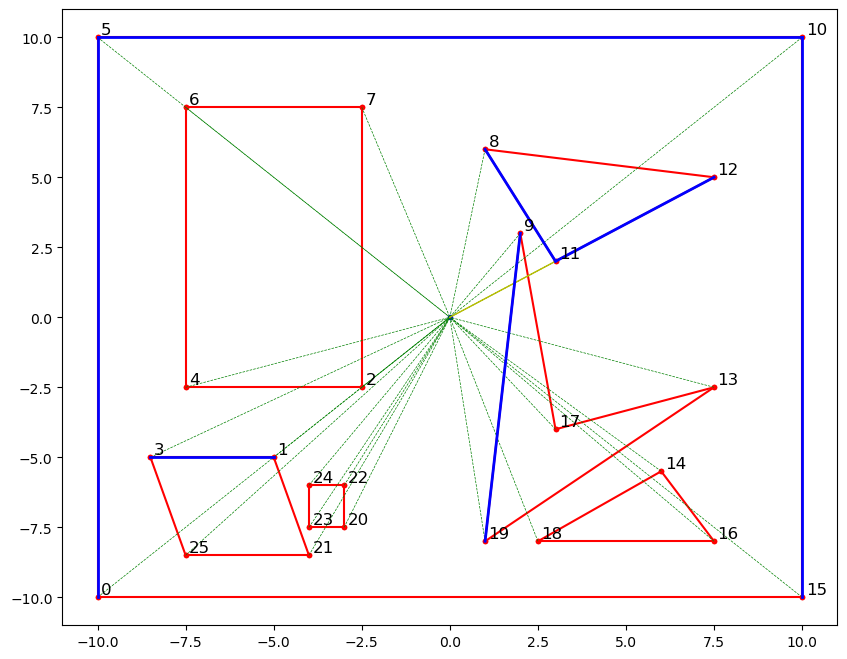

head: (7.5, 5), tail: (1, 6), orientActivelWall: 58.5, orientRay: 40.0, activeWall: ((2, 3), (1, -8))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-10, 10), (10, 10)), ((1, 6), (3, 2)), ((10, 10), (10, -10)), ((3, 2), (7.5, 5)), ((2, 3), (1, -8))])


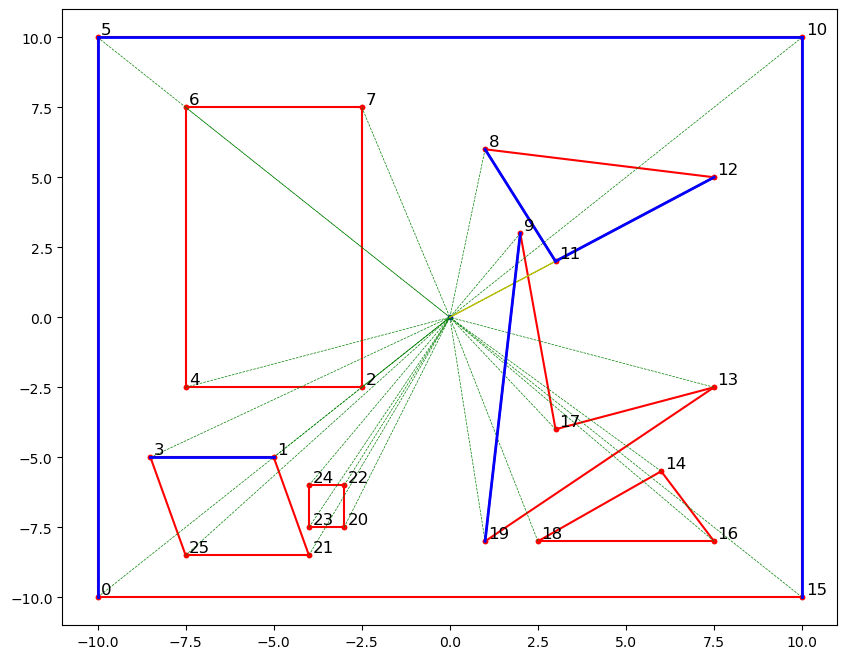

head: (7.5, -2.5), tail: (3, -4), orientActivelWall: 66.0, orientRay: -22.5, activeWall: ((2, 3), (1, -8))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-10, 10), (10, 10)), ((1, 6), (3, 2)), ((10, 10), (10, -10)), ((3, 2), (7.5, 5)), ((7.5, -2.5), (3, -4)), ((2, 3), (1, -8))])


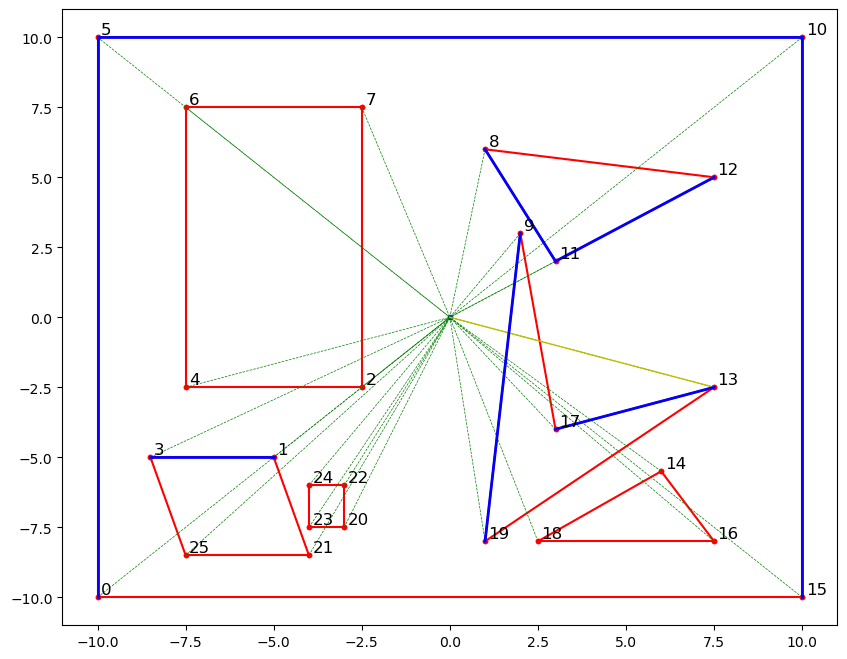

head: (6, -5.5), tail: (2.5, -8), orientActivelWall: 52.5, orientRay: -34.25, activeWall: ((2, 3), (1, -8))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-10, 10), (10, 10)), ((1, 6), (3, 2)), ((10, 10), (10, -10)), ((3, 2), (7.5, 5)), ((7.5, -2.5), (3, -4)), ((6, -5.5), (2.5, -8)), ((2, 3), (1, -8))])


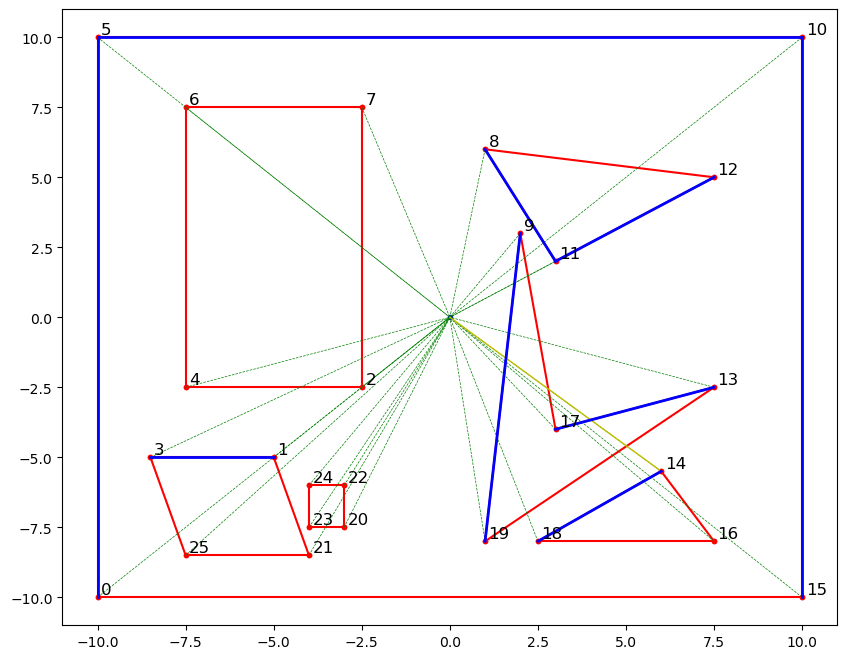

head: (10, -10), tail: (-10, -10), orientActivelWall: 101, orientRay: -200, activeWall: ((2, 3), (1, -8))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-10, 10), (10, 10)), ((1, 6), (3, 2)), ((10, 10), (10, -10)), ((3, 2), (7.5, 5)), ((7.5, -2.5), (3, -4)), ((6, -5.5), (2.5, -8)), ((10, -10), (-10, -10)), ((2, 3), (1, -8))])


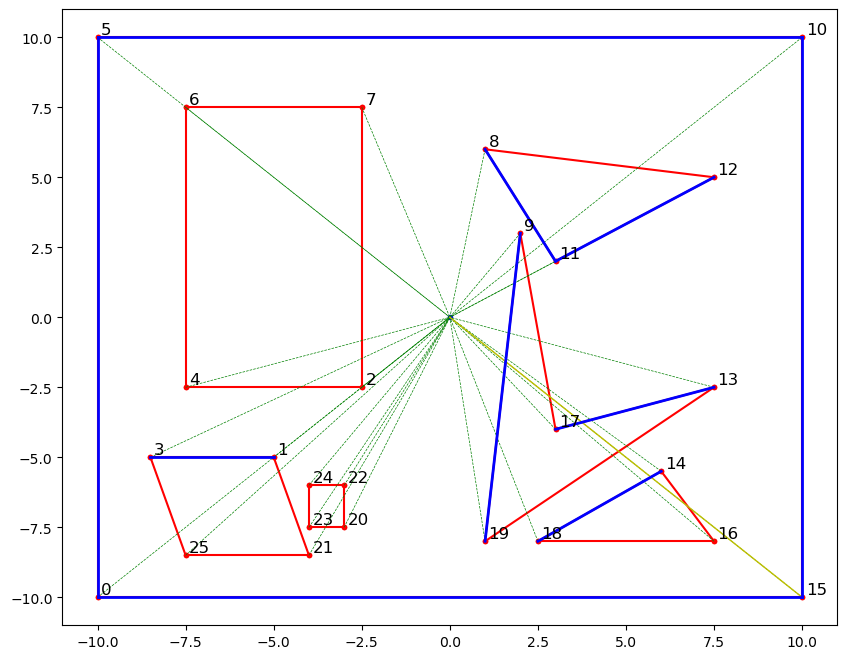

head: (7.5, -8), tail: (6, -5.5), orientActivelWall: 71.5, orientRay: 6.75, activeWall: ((2, 3), (1, -8))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-10, 10), (10, 10)), ((1, 6), (3, 2)), ((10, 10), (10, -10)), ((3, 2), (7.5, 5)), ((7.5, -2.5), (3, -4)), ((6, -5.5), (2.5, -8)), ((10, -10), (-10, -10)), ((2, 3), (1, -8))])


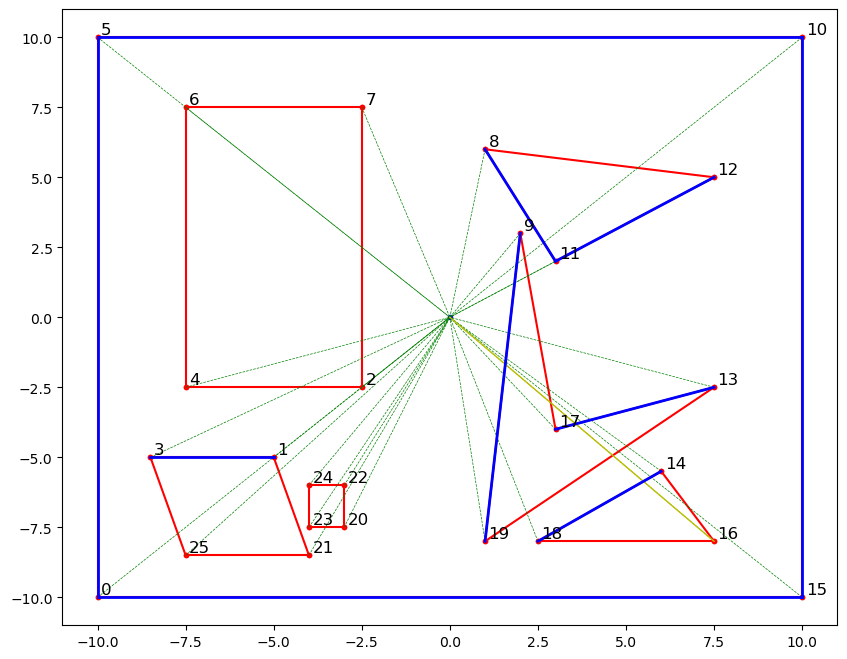

head: (3, -4), tail: (2, 3), orientActivelWall: 18, orientRay: 17, activeWall: ((2, 3), (1, -8))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-10, 10), (10, 10)), ((1, 6), (3, 2)), ((10, 10), (10, -10)), ((3, 2), (7.5, 5)), ((7.5, -2.5), (3, -4)), ((6, -5.5), (2.5, -8)), ((10, -10), (-10, -10)), ((2, 3), (1, -8))])


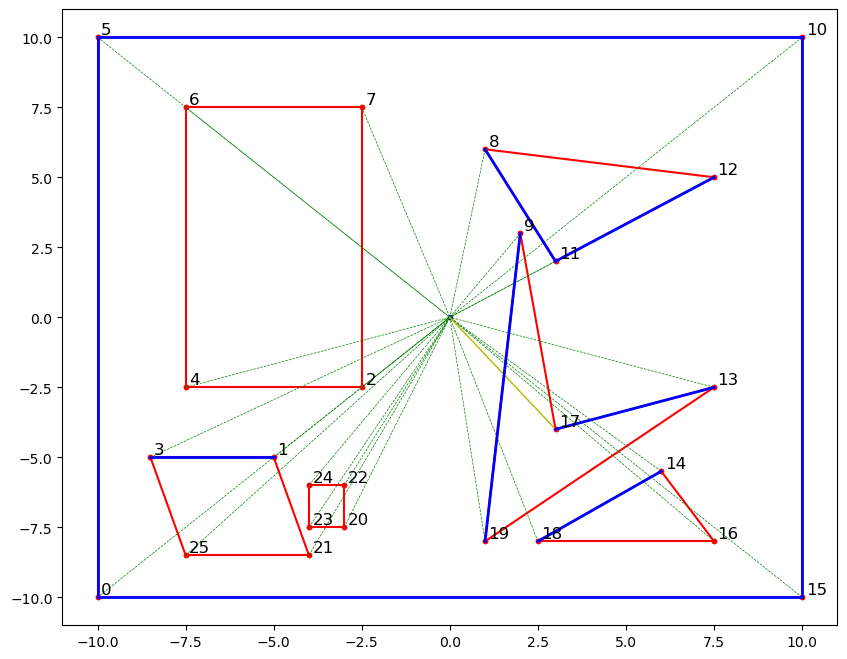

head: (2.5, -8), tail: (7.5, -8), orientActivelWall: 16.5, orientRay: 40.0, activeWall: ((2, 3), (1, -8))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-10, 10), (10, 10)), ((1, 6), (3, 2)), ((10, 10), (10, -10)), ((3, 2), (7.5, 5)), ((7.5, -2.5), (3, -4)), ((6, -5.5), (2.5, -8)), ((10, -10), (-10, -10)), ((2, 3), (1, -8))])


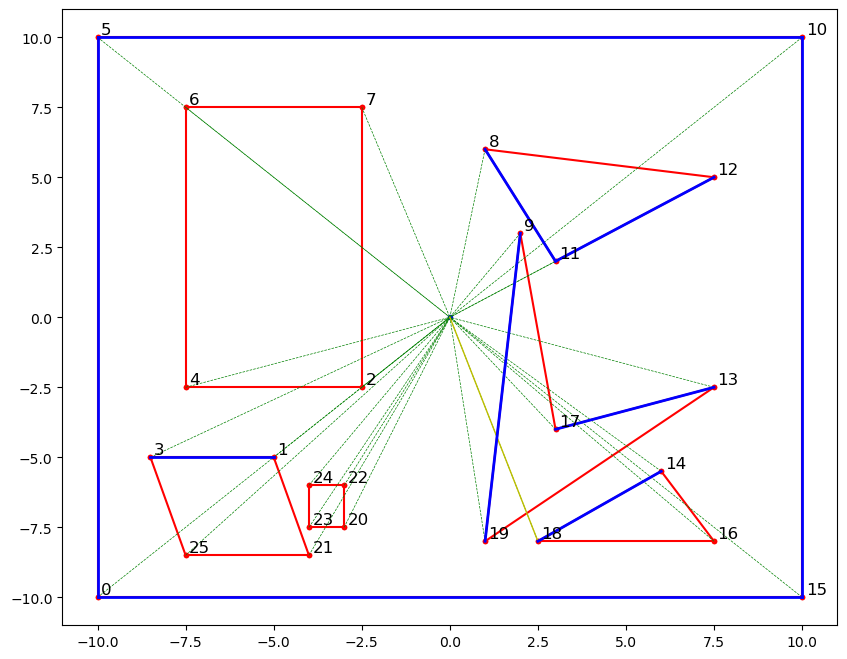

head: (1, -8), tail: (7.5, -2.5), orientActivelWall: 0, orientRay: 57.5, activeWall: ((2, 3), (1, -8))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-10, 10), (10, 10)), ((1, 6), (3, 2)), ((10, 10), (10, -10)), ((3, 2), (7.5, 5)), ((7.5, -2.5), (3, -4)), ((6, -5.5), (2.5, -8)), ((10, -10), (-10, -10))])


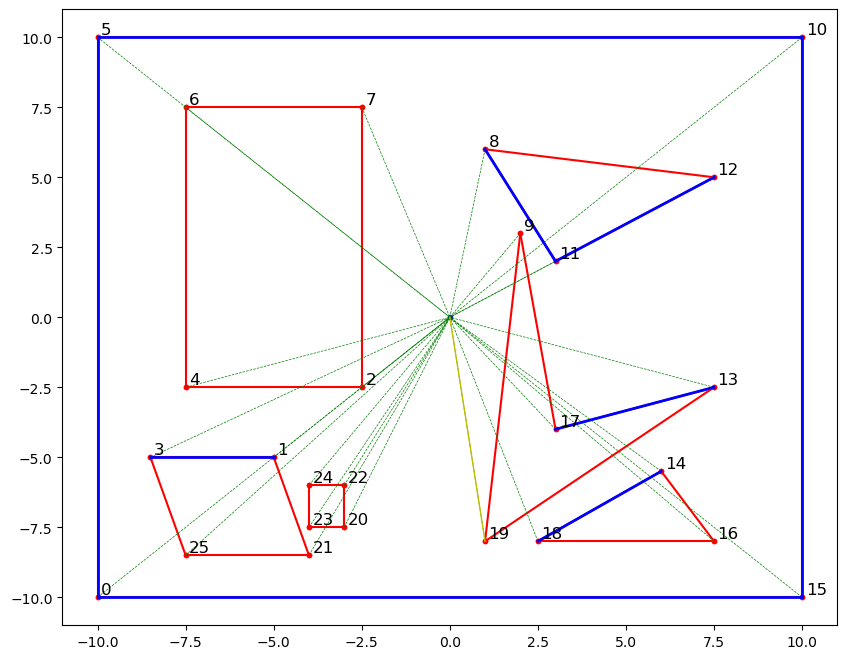

head: (-3, -7.5), tail: (-3, -6), orientActivelWall: -50.0, orientRay: -4.5, activeWall: ((10, -10), (-10, -10))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-10, 10), (10, 10)), ((1, 6), (3, 2)), ((10, 10), (10, -10)), ((3, 2), (7.5, 5)), ((7.5, -2.5), (3, -4)), ((6, -5.5), (2.5, -8)), ((10, -10), (-10, -10)), ((-3, -7.5), (-3, -6))])


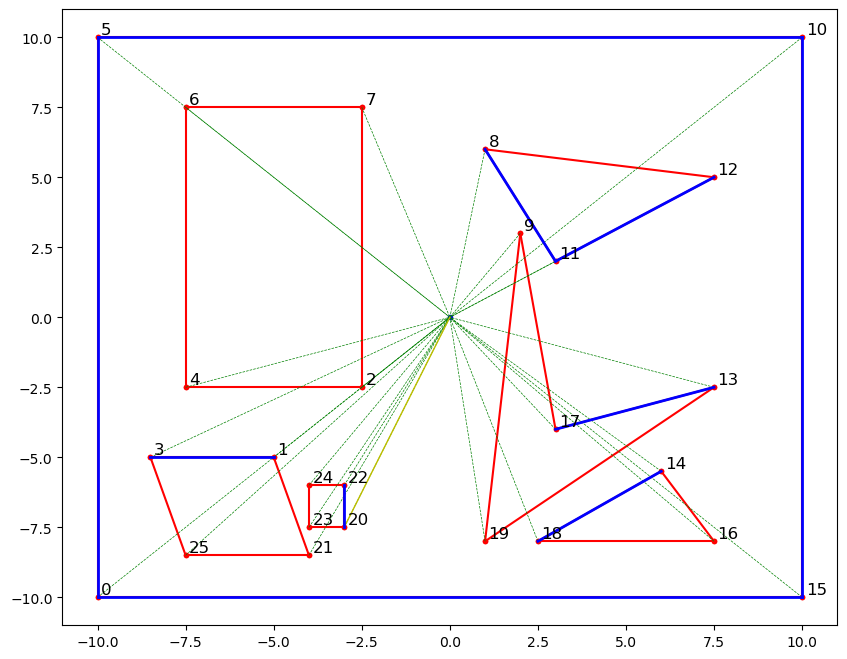

head: (-4, -8.5), tail: (-5, -5), orientActivelWall: 1.5, orientRay: -22.5, activeWall: ((-3, -7.5), (-3, -6))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-10, 10), (10, 10)), ((1, 6), (3, 2)), ((10, 10), (10, -10)), ((3, 2), (7.5, 5)), ((7.5, -2.5), (3, -4)), ((6, -5.5), (2.5, -8)), ((10, -10), (-10, -10)), ((-4, -8.5), (-5, -5)), ((-3, -7.5), (-3, -6))])


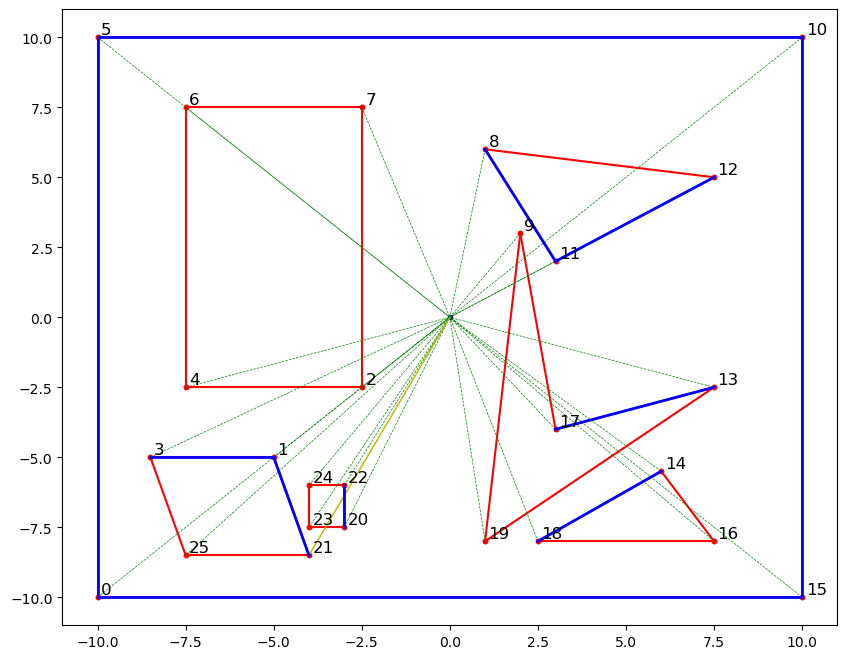

head: (-3, -6), tail: (-4, -6), orientActivelWall: 0.0, orientRay: -6, activeWall: ((-3, -7.5), (-3, -6))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-10, 10), (10, 10)), ((1, 6), (3, 2)), ((10, 10), (10, -10)), ((3, 2), (7.5, 5)), ((7.5, -2.5), (3, -4)), ((6, -5.5), (2.5, -8)), ((10, -10), (-10, -10)), ((-4, -8.5), (-5, -5)), ((-3, -6), (-4, -6))])


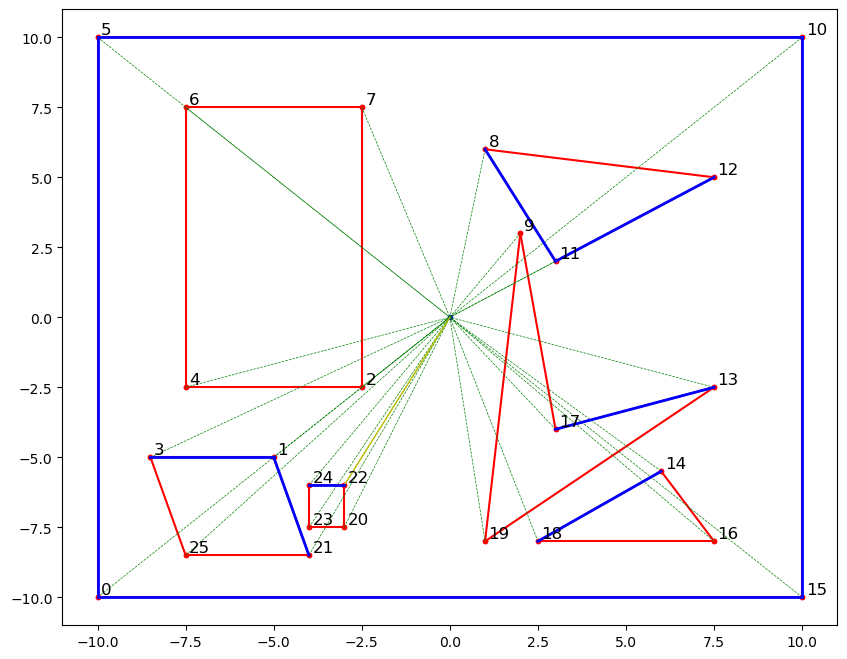

head: (-4, -7.5), tail: (-3, -7.5), orientActivelWall: 1.5, orientRay: 7.5, activeWall: ((-3, -6), (-4, -6))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-10, 10), (10, 10)), ((1, 6), (3, 2)), ((10, 10), (10, -10)), ((3, 2), (7.5, 5)), ((7.5, -2.5), (3, -4)), ((6, -5.5), (2.5, -8)), ((10, -10), (-10, -10)), ((-4, -8.5), (-5, -5)), ((-3, -6), (-4, -6))])


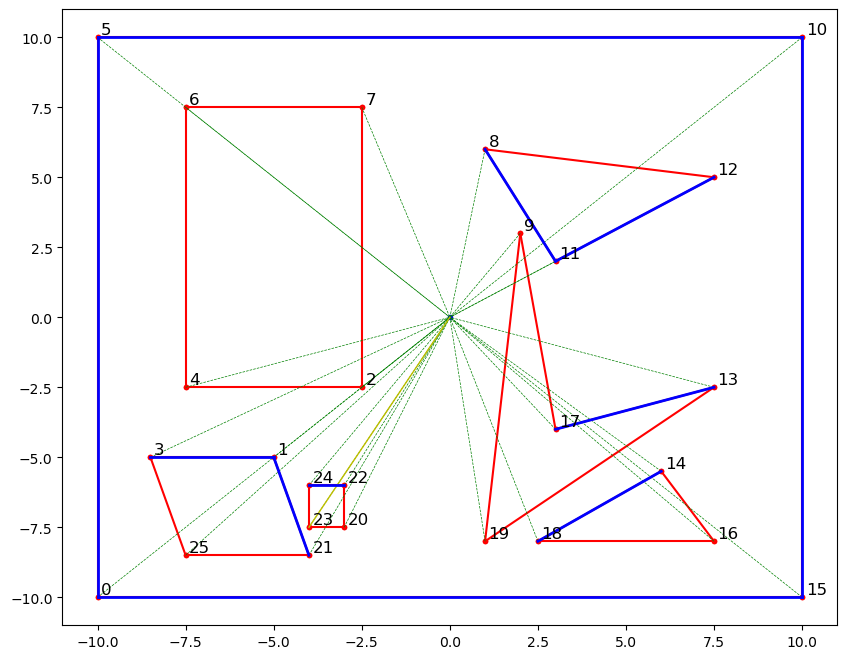

head: (-4, -6), tail: (-4, -7.5), orientActivelWall: 0, orientRay: 6.0, activeWall: ((-3, -6), (-4, -6))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-10, 10), (10, 10)), ((1, 6), (3, 2)), ((10, 10), (10, -10)), ((3, 2), (7.5, 5)), ((7.5, -2.5), (3, -4)), ((6, -5.5), (2.5, -8)), ((10, -10), (-10, -10)), ((-4, -8.5), (-5, -5))])


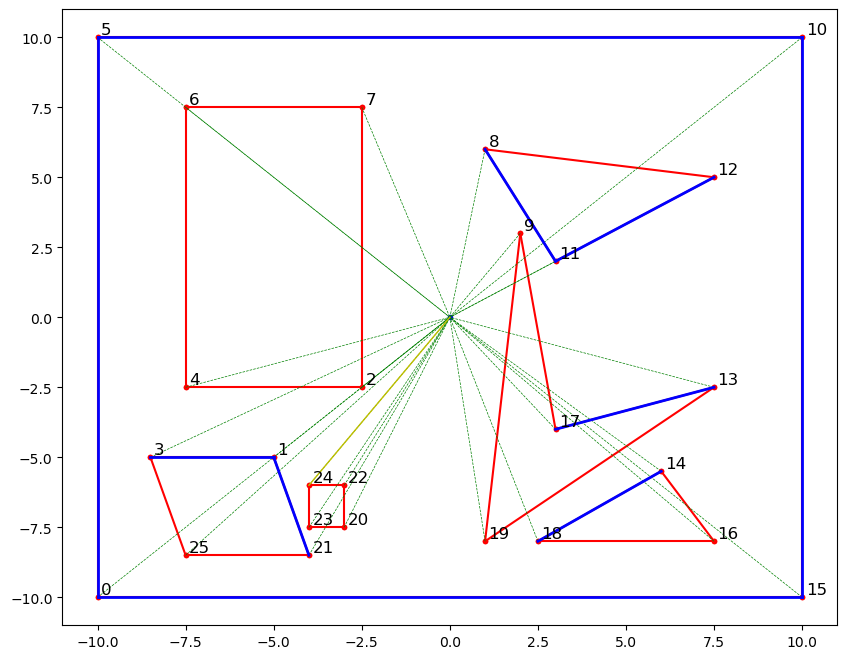

head: (-7.5, -8.5), tail: (-4, -8.5), orientActivelWall: 12.25, orientRay: 29.75, activeWall: ((-4, -8.5), (-5, -5))
deque([((-10, -10), (-10, 10)), ((-5, -5), (-8.5, -5)), ((-10, 10), (10, 10)), ((1, 6), (3, 2)), ((10, 10), (10, -10)), ((3, 2), (7.5, 5)), ((7.5, -2.5), (3, -4)), ((6, -5.5), (2.5, -8)), ((10, -10), (-10, -10)), ((-4, -8.5), (-5, -5))])


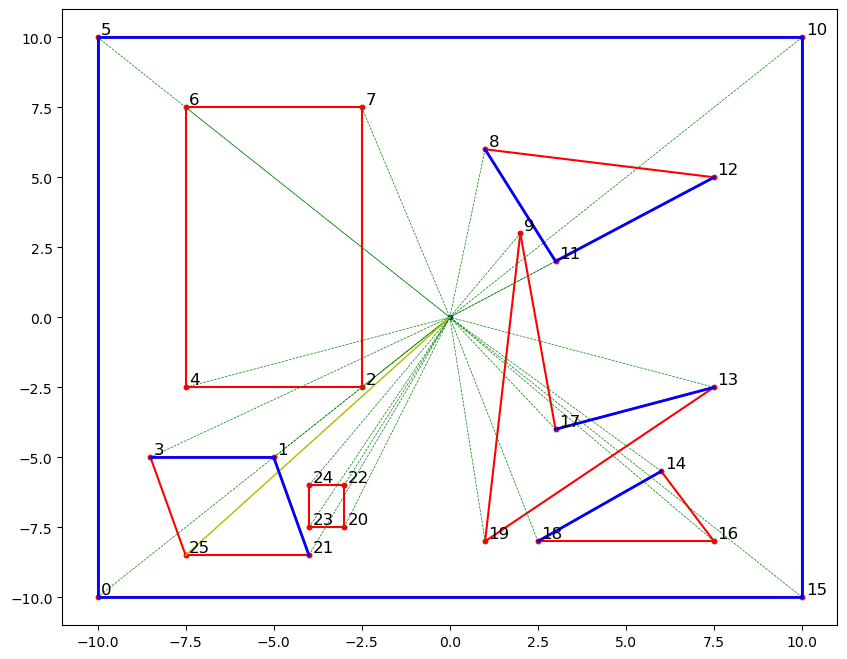

In [ ]:
# from collections import deque

# stack = deque()
# stack.append(get_wall_by_head((-10, -10)))

# def addit(fig, ax):
#     for i, wall in enumerate(stack):
#         ax.plot([wall[0][0], wall[1][0]], [wall[0][1], wall[1][1]], 'b-', linewidth=2)

# print(stack)
# plotMap(activePoint=(-10, -10), addit=addit)

# for i, point in enumerate(sorted_heading_points[1:]):
#     pointWall = get_wall_by_head(point)

#     head = point
#     tail = pointWall[1]

#     orientActiveWall = orient2d(stack[-1][0], stack[-1][1], head)
#     orientRayHead = orient2d(player_pos, head, tail)

#     print("head: {}, tail: {}, orientActivelWall: {}, orientRay: {}, activeWall: {}".format(head, tail, orientActiveWall, orientRayHead, stack[-1]))
          
#     # if head on the left of the active wall
#     if orientActiveWall > 0:
#         # if tail on the left of ray skip, otherwise make that wall active
#         if orientRayHead <= 0:
#             stack.insert(len(stack) - 1, pointWall)
            
#     # if head on the right of the active wall
#     elif orientActiveWall < 0:
#         # if tail on the left or ray skip. otherwise put wall below active
#         if orientRayHead <= 0:
#             stack.append(pointWall)
        

#     # if head on the same line as the active wall
#     else:
#         # if head is tail of active wall remove active wall
#         if head == stack[-1][1]:
#             stack.pop()

#             # if tail of the pointWall is on the left of ray skip, otherwise make that wall active
#             if orientRayHead <= 0:
#                 stack.append(pointWall)
    
#     print(stack)
#     plotMap(activePoint=point, addit=addit)

    
    